# Project 1- Group 37

# 1 Packages

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import preProcessing  as prePros
import LogisticRegression as LR
import modelEvaluation as ME
import NaiveBayes as NB

In [2]:
# Note that all of preProcessing, modelEvaluation, LogisticRegression and NaiveBayes
# are the the project modules 
# details of the functions and mode are in the same folder
# we perfer to use them to make the jupter notebook orderd and and to keep the flow

# 2 Dataset

In [3]:
#Adult Dataset
file_path = '../data/ionosphere/ionosphere.csv'
df  = pd.read_csv(file_path, delimiter=',',header=None,names=["Re1","Im1","Re2","Im2","Re3","Im3","Re4","Im4","Re5","Im5","Re6","Im6","Re7","Im7","Re8","Im8","Re9","Im9","Re10","Im10","Re11","Im11","Re12","Im12","Re13","Im13","Re14","Im14","Re15","Im15","Re16","Im16","Re17","Im17","y"])

# label encoder for the output: y
encodingMap={'b': 0, 'g': 1}
df=prePros.lebelEncoder(df,"y",encodingMap)
df.head(5)

,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Im13,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


# 2.1 Data Preprocessing

In [4]:
# Add a flag column for cleaning purpose
df=prePros.createFlag(df)
df.head(5)

,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


In [5]:
# Delete spaces and replace speceial characters by NAN
df=prePros.cleanSpecialChar(df)
df.head(5)

,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


In [6]:
# highlights the missing values
df=prePros.flagNan(df)
df.head(5)


Instances with missing values:0


,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


In [7]:
#highlights duplicate instances
df=prePros.flagDuplicates(df)
df.head(5)


 Duplicated Instances:1


,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


In [8]:
# delete flaged row
df=prePros.delRows(df,'ok')
#df.head(5)

df.head(5)

Remaining instances:350


,Re1,Im1,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


There are two malformed features, lm1 and Re1


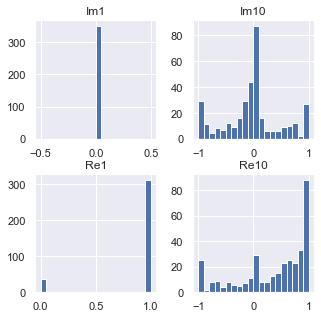

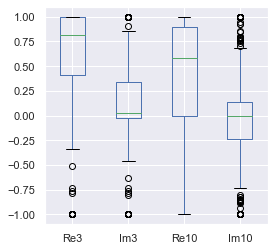

In [9]:
# Histogram; ploting the underlying distribution of each features
# in order to understand the nature of each feature and remove malformed features

# it is noticed that captial-loss, capital-gain, native country and race features can be removed
# they are malformed features, (>80%) of the data represents the same class

#plottedFeatures = [c for c in df.columns if c != 'flag']
plottedFeature=["Re1","Im1","Re10","Im10"]
prePros.draw_histogram(df[plottedFeature], bins=20, width=5, height=5)
print ('There are two malformed features, lm1 and Re1')

plottedFeaturesboxplot=["Re3","Im3","Re10","Im10"]
#plottedFeaturesboxplot = [c for c in df_copy.columns if c != 'flag']
xlable = [1 for c in df.columns if c != 'flag']
prePros.draw_boxplots(df, plottedFeaturesboxplot)


In [10]:
# Remove malformed features
df=prePros.remove_malform_features(df,["Re1","Im1"])
print ('malformed features are removed')
df.head(5)

malformed features are removed


,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,Re6,Im6,...,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y,flag
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1,ok
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0,ok
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1,ok
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0,ok
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1,ok


In [11]:
# Correlation Coefficients: 
# To study the association between each feature with the output y
y_vars = ["y"]
x_vars = [var for var in df.columns.tolist() if not var in y_vars]
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
print('The output-y is highly correlated with Re2, Re3, and Re4')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


The output-y is highly correlated with Re2, Re3, and Re4


,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,Re6,Im6,Re7,Im7,Re8,Im8,Re9,Im9,Re10,Im10,Re11,Im11,Re12,Im12,Re13,Im13,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y
Re2,1,0.14,0.47,0.025,0.44,0.0079,0.47,0.047,0.32,0.17,0.22,0.16,0.2,0.094,0.22,0.17,0.28,0.15,0.15,0.14,0.25,-0.012,0.3,-0.073,0.081,0.12,0.34,0.058,0.25,-0.0093,0.26,0.00047,0.52
Im2,0.14,1,0.00082,-0.19,-0.054,0.25,-0.3,0.21,-0.19,0.32,-0.15,0.24,-0.25,0.19,-0.25,-0.15,-0.33,0.17,-0.28,-0.035,-0.14,0.16,-0.1,-0.24,-0.047,0.00026,-0.041,0.34,-0.17,-0.12,-0.15,0.035,0.13
Re3,0.47,0.00082,1,0.038,0.6,-0.031,0.45,-0.036,0.45,0.042,0.48,0.13,0.4,0.088,0.28,0.028,0.22,0.042,0.33,0.16,0.5,0.099,0.24,-0.032,0.14,0.18,0.26,0.051,0.4,0.026,0.38,-0.1,0.51
Im3,0.025,-0.19,0.038,1,-0.011,0.27,-0.12,0.2,-0.29,0.16,-0.31,0.14,-0.36,0.16,-0.32,0.19,-0.21,-0.061,-0.12,-0.13,-0.22,-0.29,-0.18,0.042,-0.18,-0.07,-0.03,-0.16,-0.1,0.32,0.016,0.19,0.15
Re4,0.44,-0.054,0.6,-0.011,1,-0.15,0.46,-0.092,0.41,-0.021,0.63,0.083,0.62,-0.022,0.38,0.12,0.37,0.16,0.59,0.19,0.37,0.11,0.29,0.088,0.1,0.1,0.3,-0.015,0.41,-0.0083,0.55,-0.077,0.45
Im4,0.0079,0.25,-0.031,0.27,-0.15,1,-0.34,0.37,-0.36,0.43,-0.36,0.25,-0.35,0.42,-0.49,0.069,-0.4,0.078,-0.37,-0.21,-0.27,0.0071,-0.18,-0.13,-0.25,0.072,-0.14,0.079,-0.17,0.15,-0.2,0.36,0.21
Re5,0.47,-0.3,0.45,-0.12,0.46,-0.34,1,-0.25,0.67,-0.17,0.56,-0.09,0.62,-0.033,0.63,0.2,0.67,0.068,0.49,0.24,0.35,0.16,0.36,0.11,0.18,0.14,0.33,-0.032,0.31,-0.068,0.34,-0.096,0.29
Im5,0.047,0.21,-0.036,0.2,-0.092,0.37,-0.25,1,-0.34,0.44,-0.41,0.32,-0.38,0.33,-0.39,0.13,-0.47,-0.0014,-0.41,-0.04,-0.32,0.1,-0.26,-0.044,-0.25,0.071,-0.12,-0.0085,-0.16,-0.016,-0.2,0.098,0.12
Re6,0.32,-0.19,0.45,-0.29,0.41,-0.36,0.67,-0.34,1,-0.22,0.62,-0.22,0.66,-0.032,0.75,0.11,0.59,0.13,0.52,0.33,0.56,0.17,0.36,0.13,0.3,0.19,0.4,0.075,0.29,0.024,0.34,-0.15,0.17
Im6,0.17,0.32,0.042,0.16,-0.021,0.43,-0.17,0.44,-0.22,1,-0.24,0.42,-0.23,0.36,-0.34,0.078,-0.38,0.14,-0.29,-0.039,-0.36,0.18,-0.23,-0.077,-0.23,0.06,-0.21,0.14,-0.21,0.01,-0.18,0.067,0.16


# 2.2 Data Splitting

In [12]:
# Data Spliting
del df['flag']
output=['y']  # delete flag 
x_headers,y_header=prePros.define_variables(df,output)
y_header=output
df_test= pd.DataFrame(None)
X_train, y_train, X_test, y_test=prePros.Data_spliting(df,df_test, x_headers,y_header, training_percent=0.80, shuffle=True, random_seed_value=42)
print("Size of the orignal and training and test data sets are:")


(350, 33)
(280, 33)
(70, 33)
Size of the orignal and training and test data sets are:


In [13]:


y_vars = ["y"]
x_vars = ['Re2', 'Re3','Im2', 'Im3']
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
print('The output-y is highly correlated with Re2, Re3, and Re4')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

The output-y is highly correlated with Re2, Re3, and Re4


,Re2,Re3,Im2,Im3,y
Re2,1,0.47,0.14,0.025,0.52
Re3,0.47,1,0.00082,0.038,0.51
Im2,0.14,0.00082,1,-0.19,0.13
Im3,0.025,0.038,-0.19,1,0.15
y,0.52,0.51,0.13,0.15,1


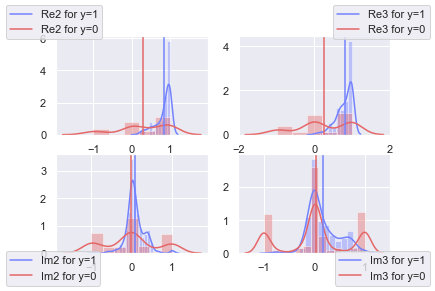

Created Ionosphere_.png


In [14]:
prePros.plot_dist_by_category(df, x_vars, 'y', y_vars, "Ionosphere_")

In [15]:
df.head(6)

,Re2,Im2,Re3,Im3,Re4,Im4,Re5,Im5,Re6,Im6,...,Im13,Re14,Im14,Re15,Im15,Re16,Im16,Re17,Im17,y
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,-0.06302,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0


In [16]:
print(df[df.isnull()])

     Re2  Im2  Re3  Im3  Re4  Im4  Re5  Im5  Re6  Im6  ...  Im13  Re14  Im14  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
5    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
6    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
7    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
8    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
9    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
10   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
11   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

In [17]:
df['y']==0

0      False
1       True
2      False
3       True
4      False
5       True
6      False
7       True
8      False
9       True
10     False
11      True
12     False
13      True
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23      True
24     False
25      True
26     False
27      True
28     False
29      True
       ...  
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350    False
Name: y, Length: 350, dtype: bool